# Final Project Proposal

## Module Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/CSC 310"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CSC 310


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Proposal 1: White Wine Quality

An analysis of this white wine dataset is the project I would prefer to do. For my midterm, I worked with a similar dataset (red wine instead of white), but this project will be different both because of the differences between red and white wine, and because I will be working with entirely different models/capabilities than before. I find this particularly fascinating because the decision tree was utterly incapable of correctly classifying these wines based on quality, so I'd like to see if the new types of models and machine learning that we've since encountered will fare better. I hope that this is a good enough reason to work with data that is different but similar, since I think this could be interesting, and now I'm invested and hope to have a presentation that I am motivated to share. Please let me know what you think.  
  
  
The data comes from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality), and this notebook works with the white wine data.

In [3]:
wine = pd.read_csv("winequality-white.csv", sep = ";")
print(wine.shape)
wine.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The dataset has 4898 rows, one for each wine sample. There are 12 columns, 11 of which are features related to the samples' chemical makeup, and one which is the target (quality). The goal is to see if a model can evaluate the features to determine the quality of a wine.

In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset is missing no values, so no imputation is needed.

In [5]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All features are continuous numerical measures of various chemical properties of a wine sample, so float64 is a good type to represent these columns. The target column (quality) is represented as int64, which is acceptable since the quality classes are discrete categories, which can be represented as integers.

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Some interesting things to note from the statistics above:

 - Many categories have some distant outliers, including both measures of acidity, residual sugar, chlorides, both sulfur dioxide measures, and sulphates. Their max values are multiple times larger than their average or even 75% values, and well more than 3 standard deviations above the mean.
 - The density values are so tightly clustered that it may be difficult to learn anything from this feature.
 - All the wines are fairly acidic, as one would expect, with pH values lying from 2.72 - 3.82.
 - There is a fair bit of variation in the alcohol content of the wines, from 8 - 14.2%, and a standard deviation of ~1.23.
 - Despite the quality range being listed from 0 - 10 at the data's source, the actual values present range from 3 - 9, with an average score of about 5.88.  
  
The presence of some of these extreme outliers will be investigated to see if they lead to imbalanced data.

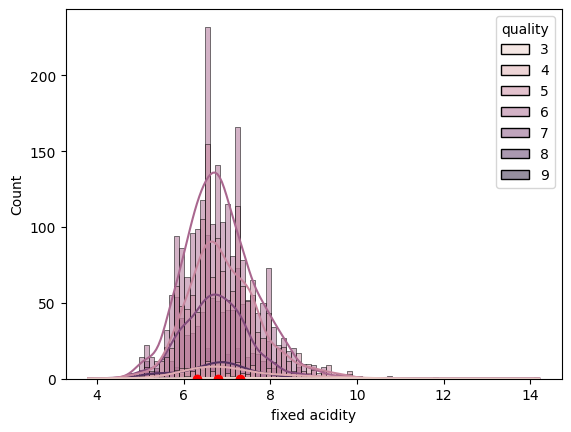

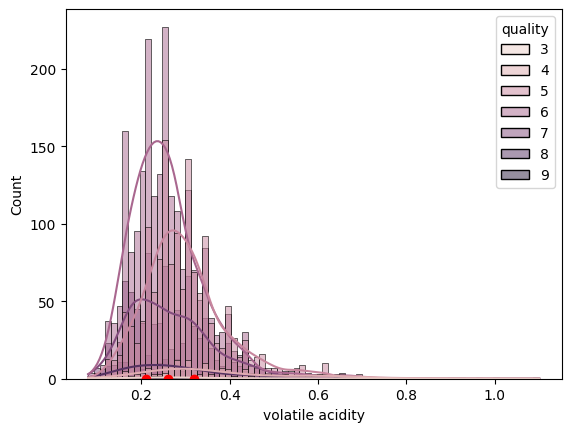

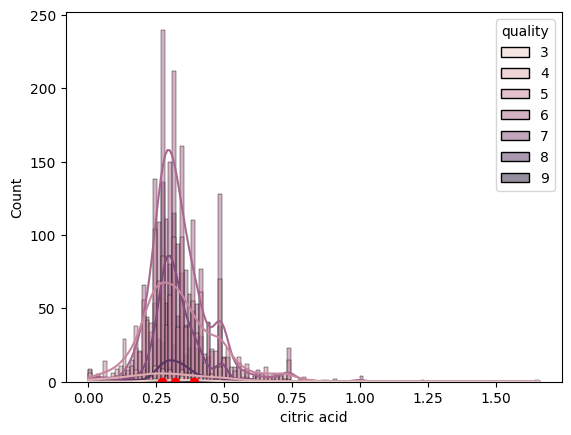

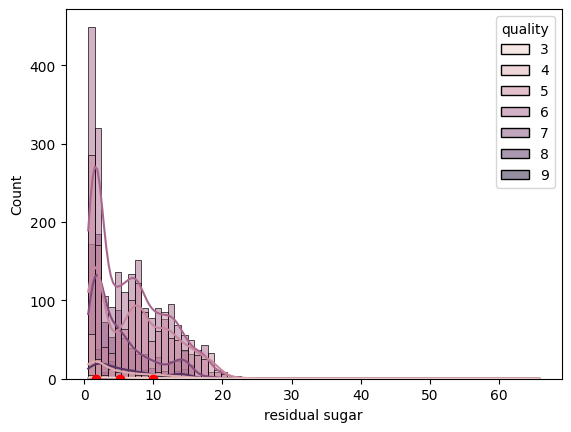

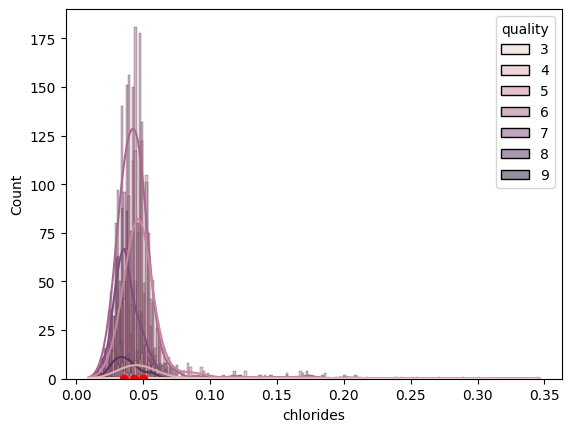

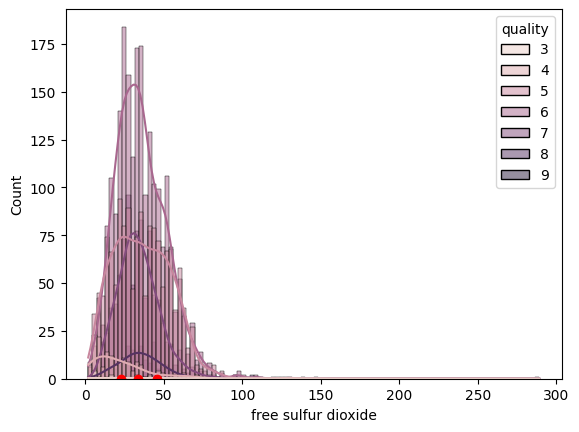

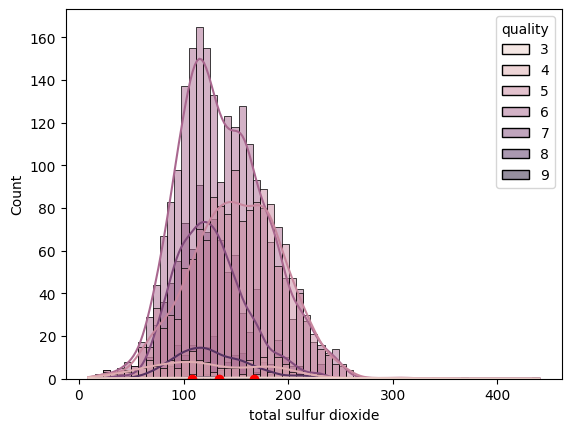

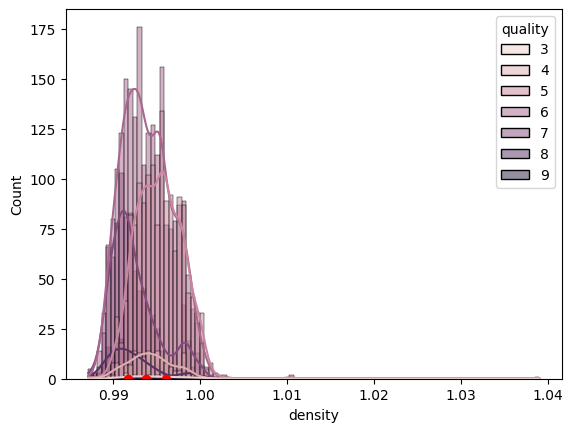

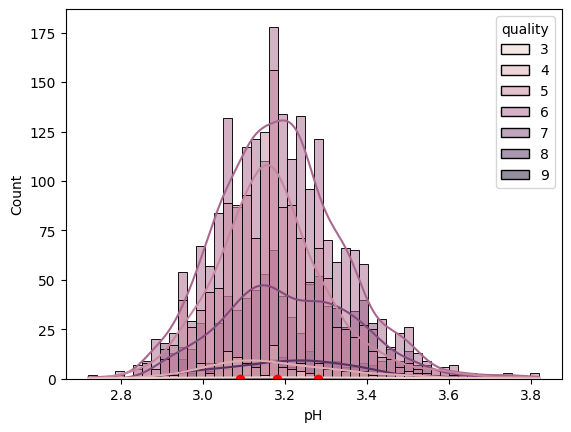

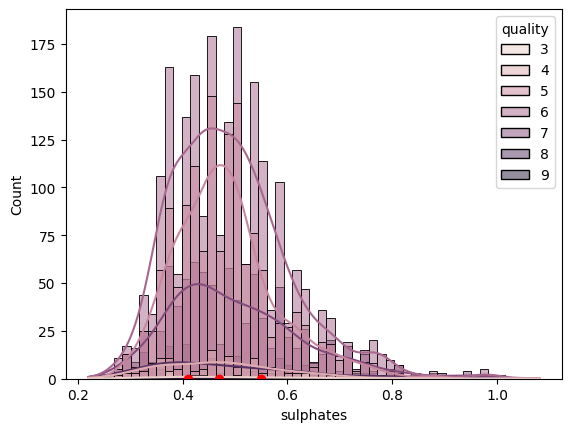

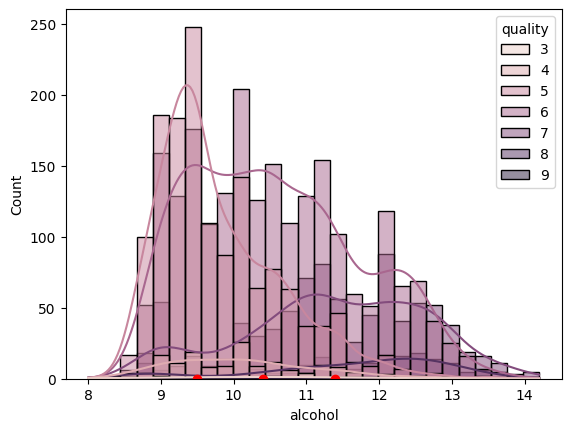

In [7]:
wine_features = wine.drop(columns = 'quality')

for col in wine_features.columns:
  percentiles = np.percentile(wine[col], [25, 50, 75])

  sns.histplot(data = wine, x = col, kde = True, hue = 'quality')
  for percentile in percentiles:
    plt.plot(percentile, 0, 'ro')

  plt.show()

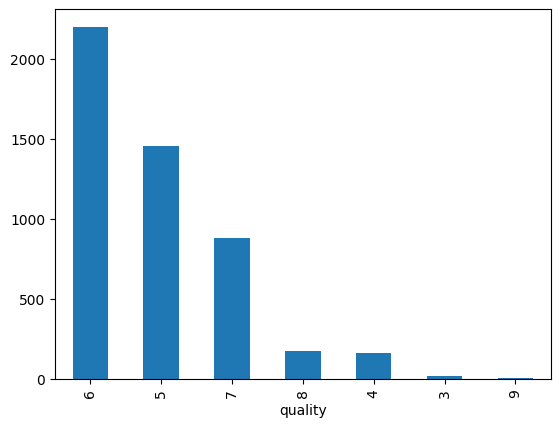

In [8]:
counts = wine.quality.value_counts()
counts.plot(kind = 'bar')
plt.show()

The goal of this analysis will be to determine if any of the modeling techniques we've covered are capable of correctly classifying these wines by quality. The decision tree was clearly inadequate, so now that we've got more tools, I'd like to see what's possible. I'll attempt to use every type of model we've studied, and try various parameters for each. I'm not 100% sure what to expect, but I'm hoping for a model that can chemically evaluate wines for quality. However, given the subjectivity of quality assessments, I think it's definitely possible that I just end up creating even more confused models.

## Proposal 2: Bank Marketing Campaign

The data for this proposal also comes from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing), and is composed of data related to direct marketing campaigns of a Portuguese bank. The goal of the model built using this data will be to predict if the client will subscribe a term deposit (target variable listed as 'y' in the dataset). This will be evaluated using the 16 features of the data, which include:
 - Customer's personal info (age, job, marital status, education)
 - Customer's financial info (credit default status, balance, loan information)
 - Information related to the current marketing campaign (date, duration, and number of previous contacts, outcomes thereof).

In [9]:
bank = pd.read_csv("bank.csv", sep = ";")
print(bank.shape)
bank.head()

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


There are four different .csv files available at the link above, but for this notebook's purposes the bank.csv file should suffice, since it contains the most important features as well as 4,521 customer samples, about 10% of the total. More is likely not necessary and will probably cause more complex models (like SVM) to become computationally prohibitive.

In [10]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values, therefore no need for imputation and all rows and columns may be used for analysis.

In [11]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

There are seven features represented as int64 and nine represented as objects, with the target variable also being an object. This means some preprocessing will be necessary to turn the data into something that a machine learning model can handle.  
Ten of the features listed could be considered categorical, and the other six are numerical. Some of the categorical columns contain binary yes/no info and can simply be converted to binary types (default, housing, etc), while others will require some label encoding (job, marital, etc).

In [12]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Among the numerical columns, 'day' is sort of a false numerical value, since a date is not a number in the traditional sense, and if there is a need to assess how long ago a customer was last contacted, there is the pdays column.  
Some interesting things to note from the numerical stats:
 - Most customers are middle aged
 - Most customers have a balance well under the 'average', indicating some wealthy outliers
 - Most customers haven't been part of a marketing campaign before, again with some high-end outliers driving up the average.

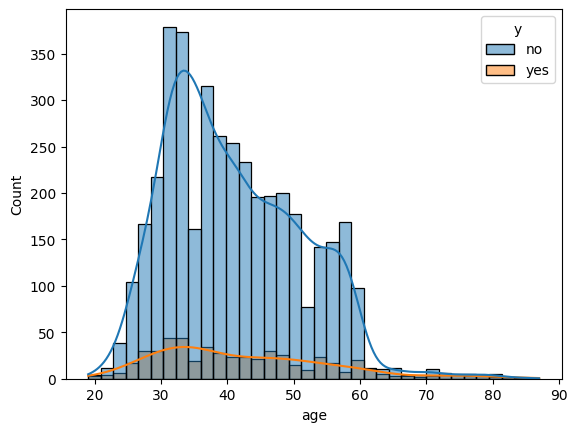

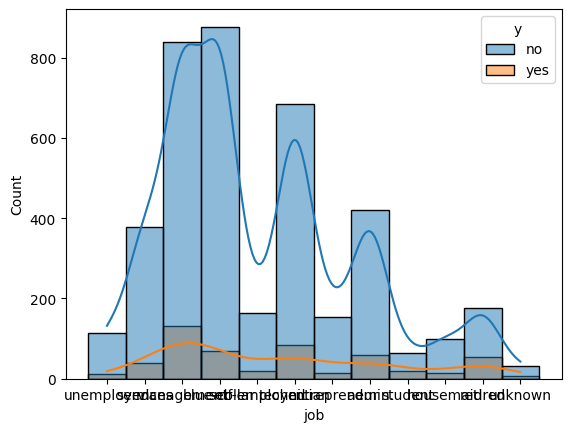

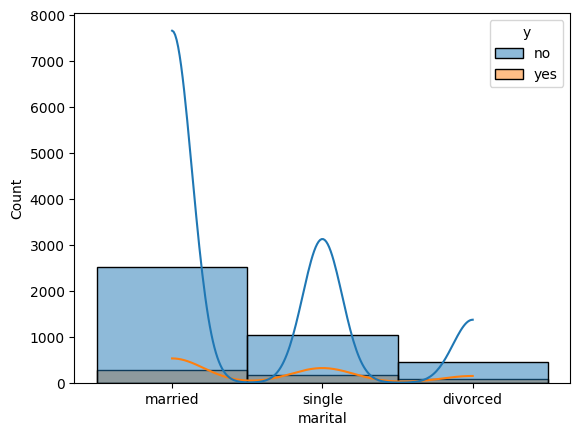

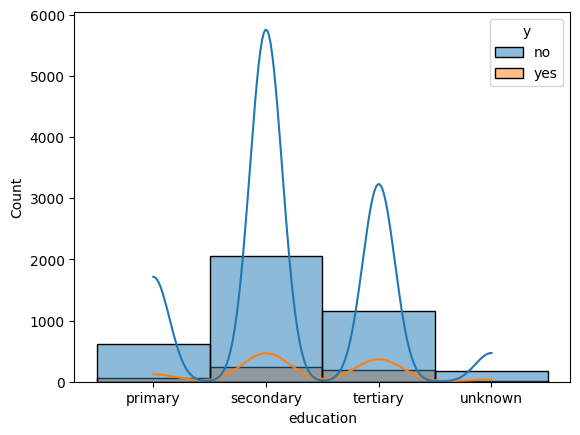

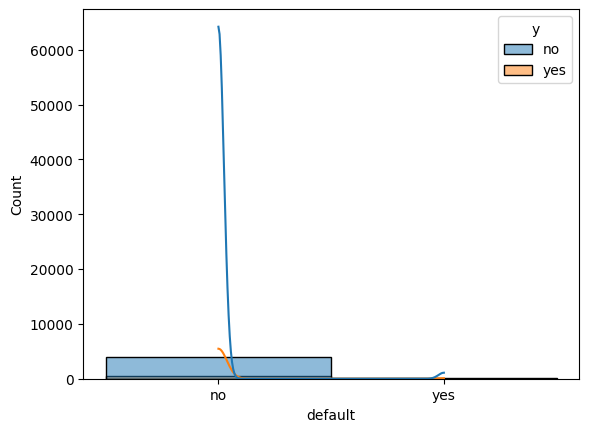

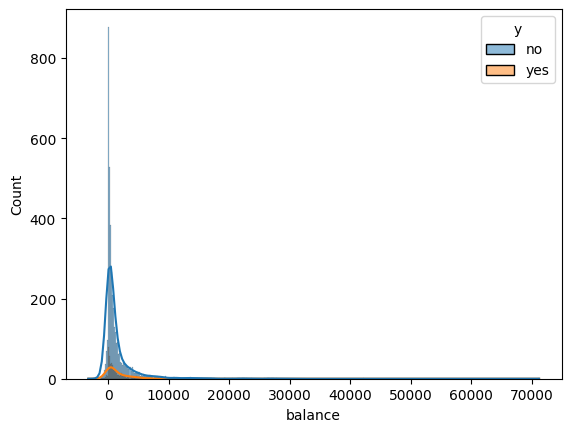

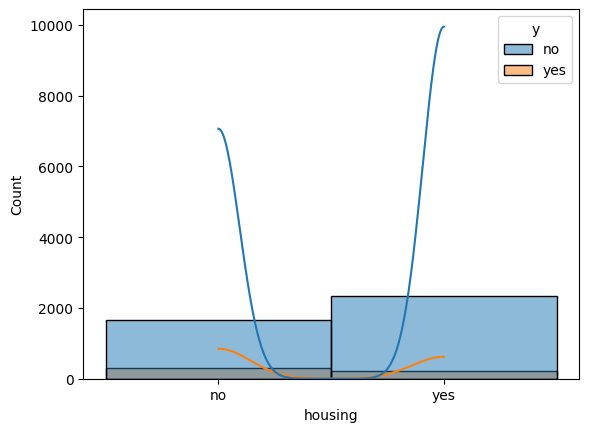

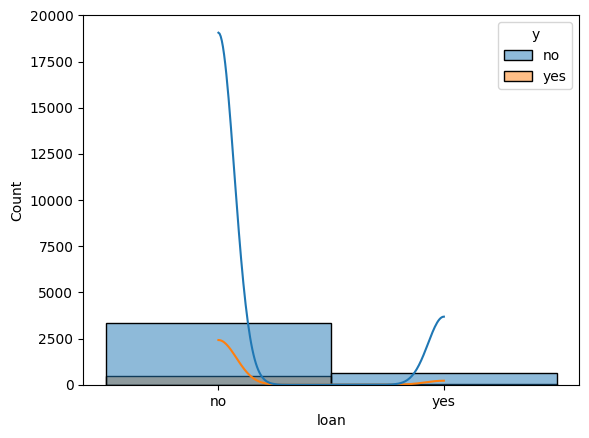

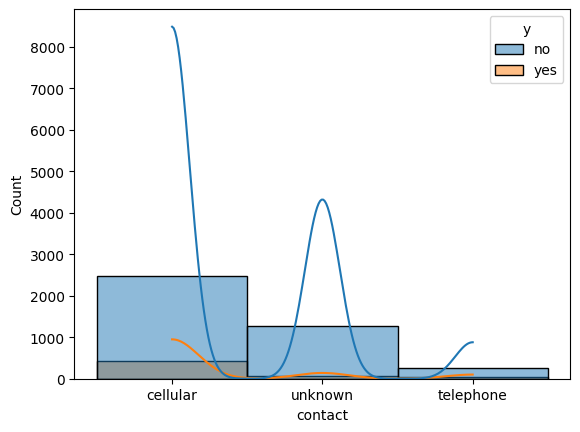

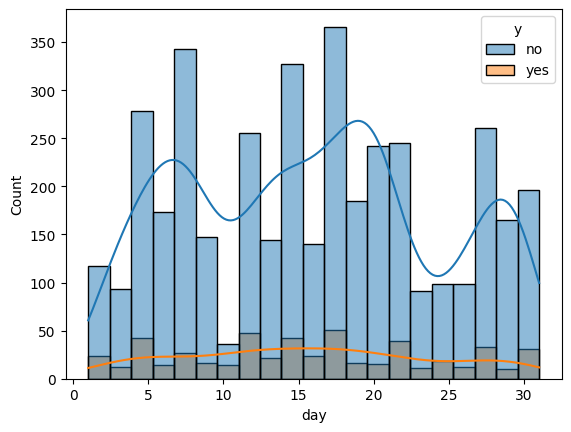

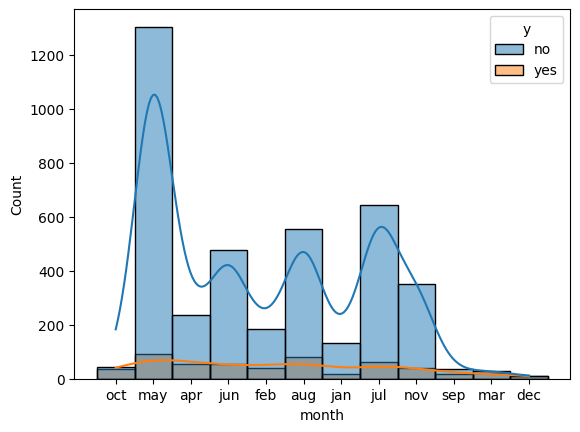

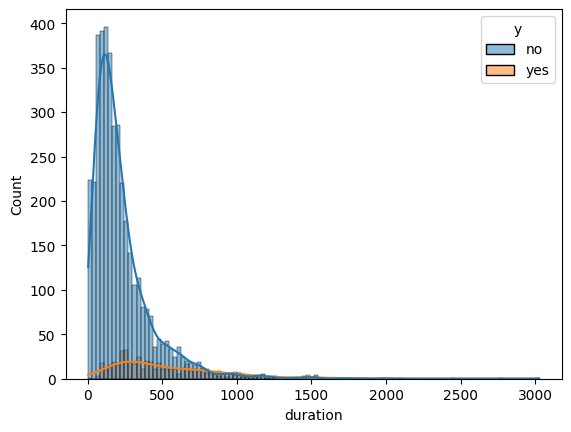

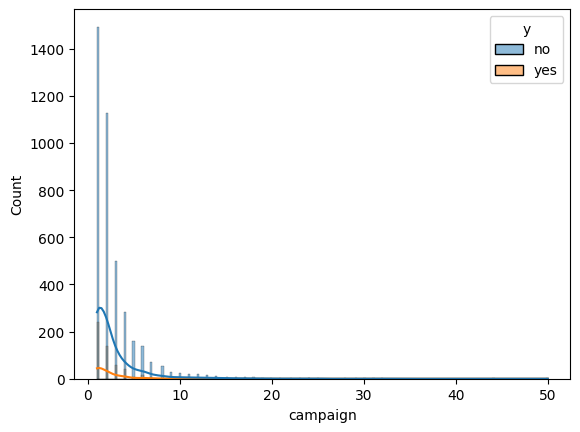

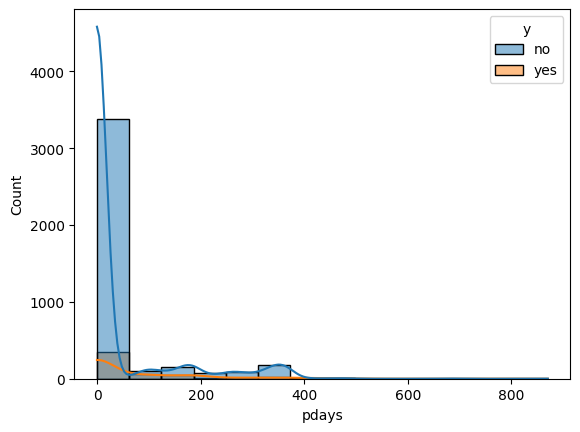

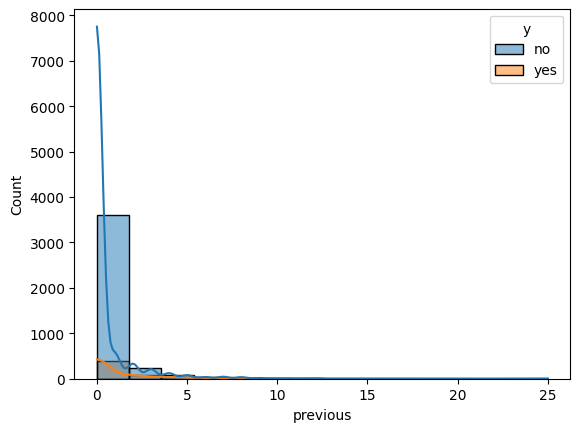

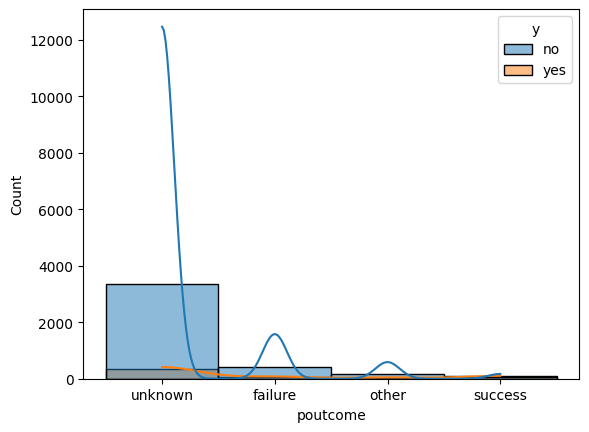

In [13]:
bank_features = bank.drop(columns = 'y')

for col in bank_features.columns:
  sns.histplot(data = bank, x = col, kde = True, hue = 'y')
  plt.show()

Some interesting notes from the feature distributions:
 - Relatively normal distribution of age, with a sharp drop around retirement age
 - Lots of married customers, and lots of college educated customers
 - A few outliers in terms of account balance that are strikingly far from the rest of the otherwise normally distributed data
 - Most contact is done to cellular phones
 - By far the most contact done in the month of May, and in the summer months
 - Nearly all calls are less than five minutes
 - Very few campaigns have ended in success

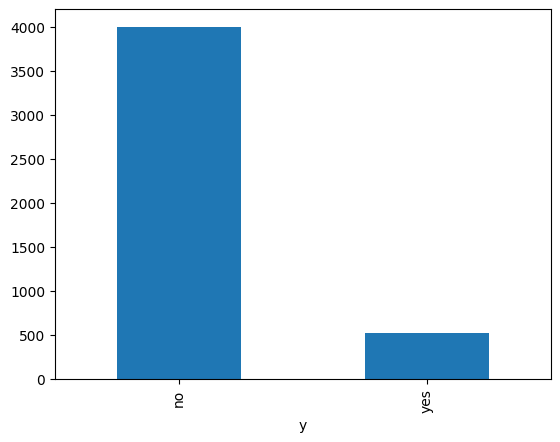

In [14]:
counts = bank.y.value_counts()
counts.plot(kind = 'bar')
plt.show()

From the bar graph of results, it's clear that the data are quite imbalanced, with most of the marketing campaigns end in failure.

The goal of this analysis will be to determine if there are any clear patterns in which customers subscribe a term deposit to the bank, so that it's clear where most efforts should be concentrated. For example, if all customers with housing loans decided they couldn't afford this, then the bank can avoid spending resources pursuing these customers.  
In order to find these trends, I'll attempt to use every type of model we've studied, and try various parameters for each. People tend to make decisions at least semi-reasonably, so I'm hoping for a model that can help show how people come to their decisions regarding the marketing campaign. I expect to find at least a 2-3 demographic or financial trends that can help this bank use marketing resources effectively.